# Yun Cheng  HW3
# USC-ID: 5013232478

## Part b:Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1,2, and 3 in other folders as test data and other datasets as train data

In [1]:
import warnings
warnings.filterwarnings('ignore')
#Get all the file path and folder name
import pandas as pd
import glob
all_files = glob.glob('./AReM/*/*.csv')
all_folders=glob.glob('./AReM/*/')

In [2]:
#Sort the file path
import re
def sorting(path):
    name, tail = path.split('/')[-2:]
    tail_number = int(re.search('\d+', tail)[0])
    return (name, tail_number)
all_files = sorted(all_files, key=sorting)

In [3]:
test_data=[]
test_name=[]
for i in range(len(all_folders)):
    # All the folders needs dataset1&2
    temp1=pd.read_csv(all_folders[i]+'dataset1.csv',skiprows=4,usecols=[1,2,3,4,5,6])
    temp2=pd.read_csv(all_folders[i]+'dataset2.csv',skiprows=4,usecols=[1,2,3,4,5,6])
    test_data.append(temp1)
    test_data.append(temp2)
    test_name.append(all_folders[i]+'dataset1.csv')
    test_name.append(all_folders[i]+'dataset2.csv')
    #All folders except Bending1 & bending3 needs dataset3
    if i!=0 & i!=2:
        temp3=pd.read_csv(all_folders[i]+'dataset3.csv',skiprows=4,usecols=[1,2,3,4,5,6])
        test_data.append(temp3)
        test_name.append(all_folders[i]+'dataset3.csv')
test_set=pd.concat(test_data)

In [4]:
#Get label name from each folder
test_label=[]
for path in test_name:
    name = path.split('/')[-2]
    test_label.append(re.search('\D+', name)[0])

In [5]:
train_data=[]
train_name=[]
for i in range(len(all_files)):
    if all_files[i] in test_name:
        continue
    else:
        #print(all_files[i]) For data cleaning check
        #cycling dataset 9/14,remove comma at last row
        
        temp1=pd.read_csv(all_files[i],skiprows=4,usecols=[1,2,3,4,5,6])
        
        train_data.append(temp1)
        train_name.append(all_files[i])  
    
train_set=pd.concat(test_data)

## Part c Feature Extraction
Classification of time series usually needs extracting features from them. In this
problem, we focus on time-domain features.

### C(i)Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

 They are included minimum, maximum, mean, standard deviation, various quantiles, number of peaks and so on.


### C(ii)Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly

In [6]:
# Get column names in one list
from itertools import chain
Variablename = [['min_'+'variable'+str(x), 'max_'+'variable'+str(x), 'mean_'+'variable'+str(x), 
             'median_'+ 'variable'+str(x),'std_'+ 'variable'+str(x), '1stQ_'+'variable'+str(x), '3rdQ_'+ 'variable'+str(x)] for x in range(1,7)]
Columnsname = list(chain.from_iterable(Variablename))#combine each varaible name into one list

In [7]:
#Getting features
import numpy as np
FeatureResult=[]
index=[]
for number in range(88):
    ind='Instance'+str(number+1)
    index.append(ind)
for file in all_files:
    temp_file = pd.read_csv(file, skiprows=4,usecols=[1,2,3,4,5,6])
    temp_file_feature = temp_file.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']]
    FeatureResult.append(pd.DataFrame(temp_file_feature.to_numpy().reshape(1,42), columns=Columnsname))
    df_feature = pd.concat(FeatureResult)
df_feature.index=list((index))
df_feature.isnull().values.any()#Check NaN values
                                #Reshape Bending2/dataset4 

False

In [8]:
df_feature.head()

,min_variable1,max_variable1,mean_variable1,median_variable1,std_variable1,1stQ_variable1,3rdQ_variable1,min_variable2,max_variable2,mean_variable2,...,std_variable5,1stQ_variable5,3rdQ_variable5,min_variable6,max_variable6,mean_variable6,median_variable6,std_variable6,1stQ_variable6,3rdQ_variable6
Instance1,37.25,45.00,40.624792,40.50,1.476967,39.25,42.00,0.0,1.30,0.358604,...,2.188449,33.0000,36.00,0.0,1.92,0.570583,0.43,0.582915,0.0,1.30
Instance2,38.00,45.67,42.812812,42.50,1.435550,42.00,43.67,0.0,1.22,0.372438,...,1.995255,32.0000,34.50,0.0,3.11,0.571083,0.43,0.601010,0.0,1.30
Instance3,35.00,47.40,43.954500,44.33,1.558835,43.00,45.00,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.0,1.79,0.493292,0.43,0.513506,0.0,0.94
Instance4,33.00,47.75,42.179813,43.50,3.670666,39.15,45.00,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.0,2.18,0.613521,0.50,0.524317,0.0,1.00
Instance5,33.00,45.75,41.678063,41.75,2.243490,41.33,42.75,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.0,1.79,0.383292,0.43,0.389164,0.0,0.50


### C(iii)Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [9]:
import numpy as np
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

In [10]:
#Citation: http://www.jtrive.com/the-empirical-bootstrap-for-confidence-intervals-in-python.html

def bootstrap(data, n=1000, func=np.std):
    result = list()
    size = len(data) #bootstrap same length of origial data
    for i in range(n):
        sample = np.random.choice(data, size=size, replace=True)
        result.append(func(sample))
    result.sort()
    def ci(p):
        u_pval = (1+p)/2.
        l_pval = (1-u_pval)
        l_indx = int(np.floor(n*l_pval))
        u_indx = int(np.floor(n*u_pval))
        return(result[l_indx],result[u_indx])
    return(ci)

In [11]:
intervals=[]
for column in df_feature.columns: 
    column=df_feature[column].to_numpy()
    boot = bootstrap(column)
    intervals_temp = boot(0.9)
    intervals.append( intervals_temp)

In [12]:
#Make each confidence interval name
variable=['min_variable','max_variable','mean_variable','median_variable','std_variable','1stQ_variable','3rdQ_variable']
key=[]
for variable in variable:
    for i in range(6):
        keys=variable+'{}'.format(i+1)
        key.append(keys)

In [13]:
interval_dict=dict(zip(key, intervals))
interval_dict

{'min_variable1': (8.17581738195759, 10.718259821213579),
 'min_variable2': (3.318031641604715, 5.276904125409171),
 'min_variable3': (4.692211532174113, 5.843601512404429),
 'min_variable4': (4.779817173089485, 5.975752289988404),
 'min_variable5': (1.562567457838003, 1.934282076037401),
 'min_variable6': (5.5477907795859265, 6.608288076802578),
 'max_variable1': (4.298705063325673, 5.862684347197514),
 'max_variable2': (0.0, 0.0),
 'max_variable3': (4.616225309207936, 5.360654212380308),
 'max_variable4': (1.3936844088867844, 1.6988170339089557),
 'max_variable5': (1.2267839185972074, 1.539236786131683),
 'max_variable6': (0.802844866652592, 0.9382803137031024),
 'mean_variable1': (0.8268352125530921, 1.0331579422553954),
 'mean_variable2': (1.8572886377903361, 2.2854984947586736),
 'mean_variable3': (2.7458247393967943, 3.080579799457636),
 'mean_variable4': (4.1463483137386055, 5.448868000519629),
 'mean_variable5': (3.394377200941444, 4.491786078305215),
 'mean_variable6': (3.3851

### C(iv). Use your judgement to select the three most important time-domain features (one option may be min, mean, and max)

I choose 1st Quartile, Min and Mean,because they have large confidence intervals.


## (d) Binary Classification Using Logistic Regression

## d(i). Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).

In [14]:
train_index=[]
Result=[]
for number in range(68):
    ind='Instance'+str(number+1)
    train_index.append(ind)
for instance in train_data:
    train_feature = instance.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    Result.append(pd.DataFrame(train_feature.to_numpy().reshape(1,42), columns=Columnsname))
    train_set_feature = pd.concat(Result)
train_set_feature.index=train_index

In [15]:
#Attache label see if it is bending data
train_label=[]
for path in train_name:
    name = path.split('/')[-2]
    train_label.append(re.search('\D+', name)[0])
train_set_feature['label']=train_label



In [16]:
#Extract variable 1,2 and 6
extract_train=train_set_feature[['1stQ_variable1','1stQ_variable2','1stQ_variable6',\
                       'min_variable1','min_variable2','min_variable6',\
                       'mean_variable1','mean_variable2','mean_variable6','label']]

#Choose bending data as 1 and others as 0
extract_train['class'] = np.where(extract_train['label']=='bending', '1', '0')

In [17]:
extract_train.head()

,1stQ_variable1,1stQ_variable2,1stQ_variable6,min_variable1,min_variable2,min_variable6,mean_variable1,mean_variable2,mean_variable6,label,class
Instance1,43.00,0.00,0.00,35.00,0.0,0.0,43.954500,0.426250,0.493292,bending,1
Instance2,39.15,0.00,0.00,33.00,0.0,0.0,42.179813,0.696042,0.613521,bending,1
Instance3,41.33,0.43,0.00,33.00,0.0,0.0,41.678063,0.535979,0.383292,bending,1
Instance4,42.50,0.00,0.43,37.00,0.0,0.0,43.454958,0.378083,0.679646,bending,1
Instance5,43.31,0.43,0.00,36.25,0.0,0.0,43.969125,0.413125,0.555313,bending,1


In [18]:
import seaborn as sns

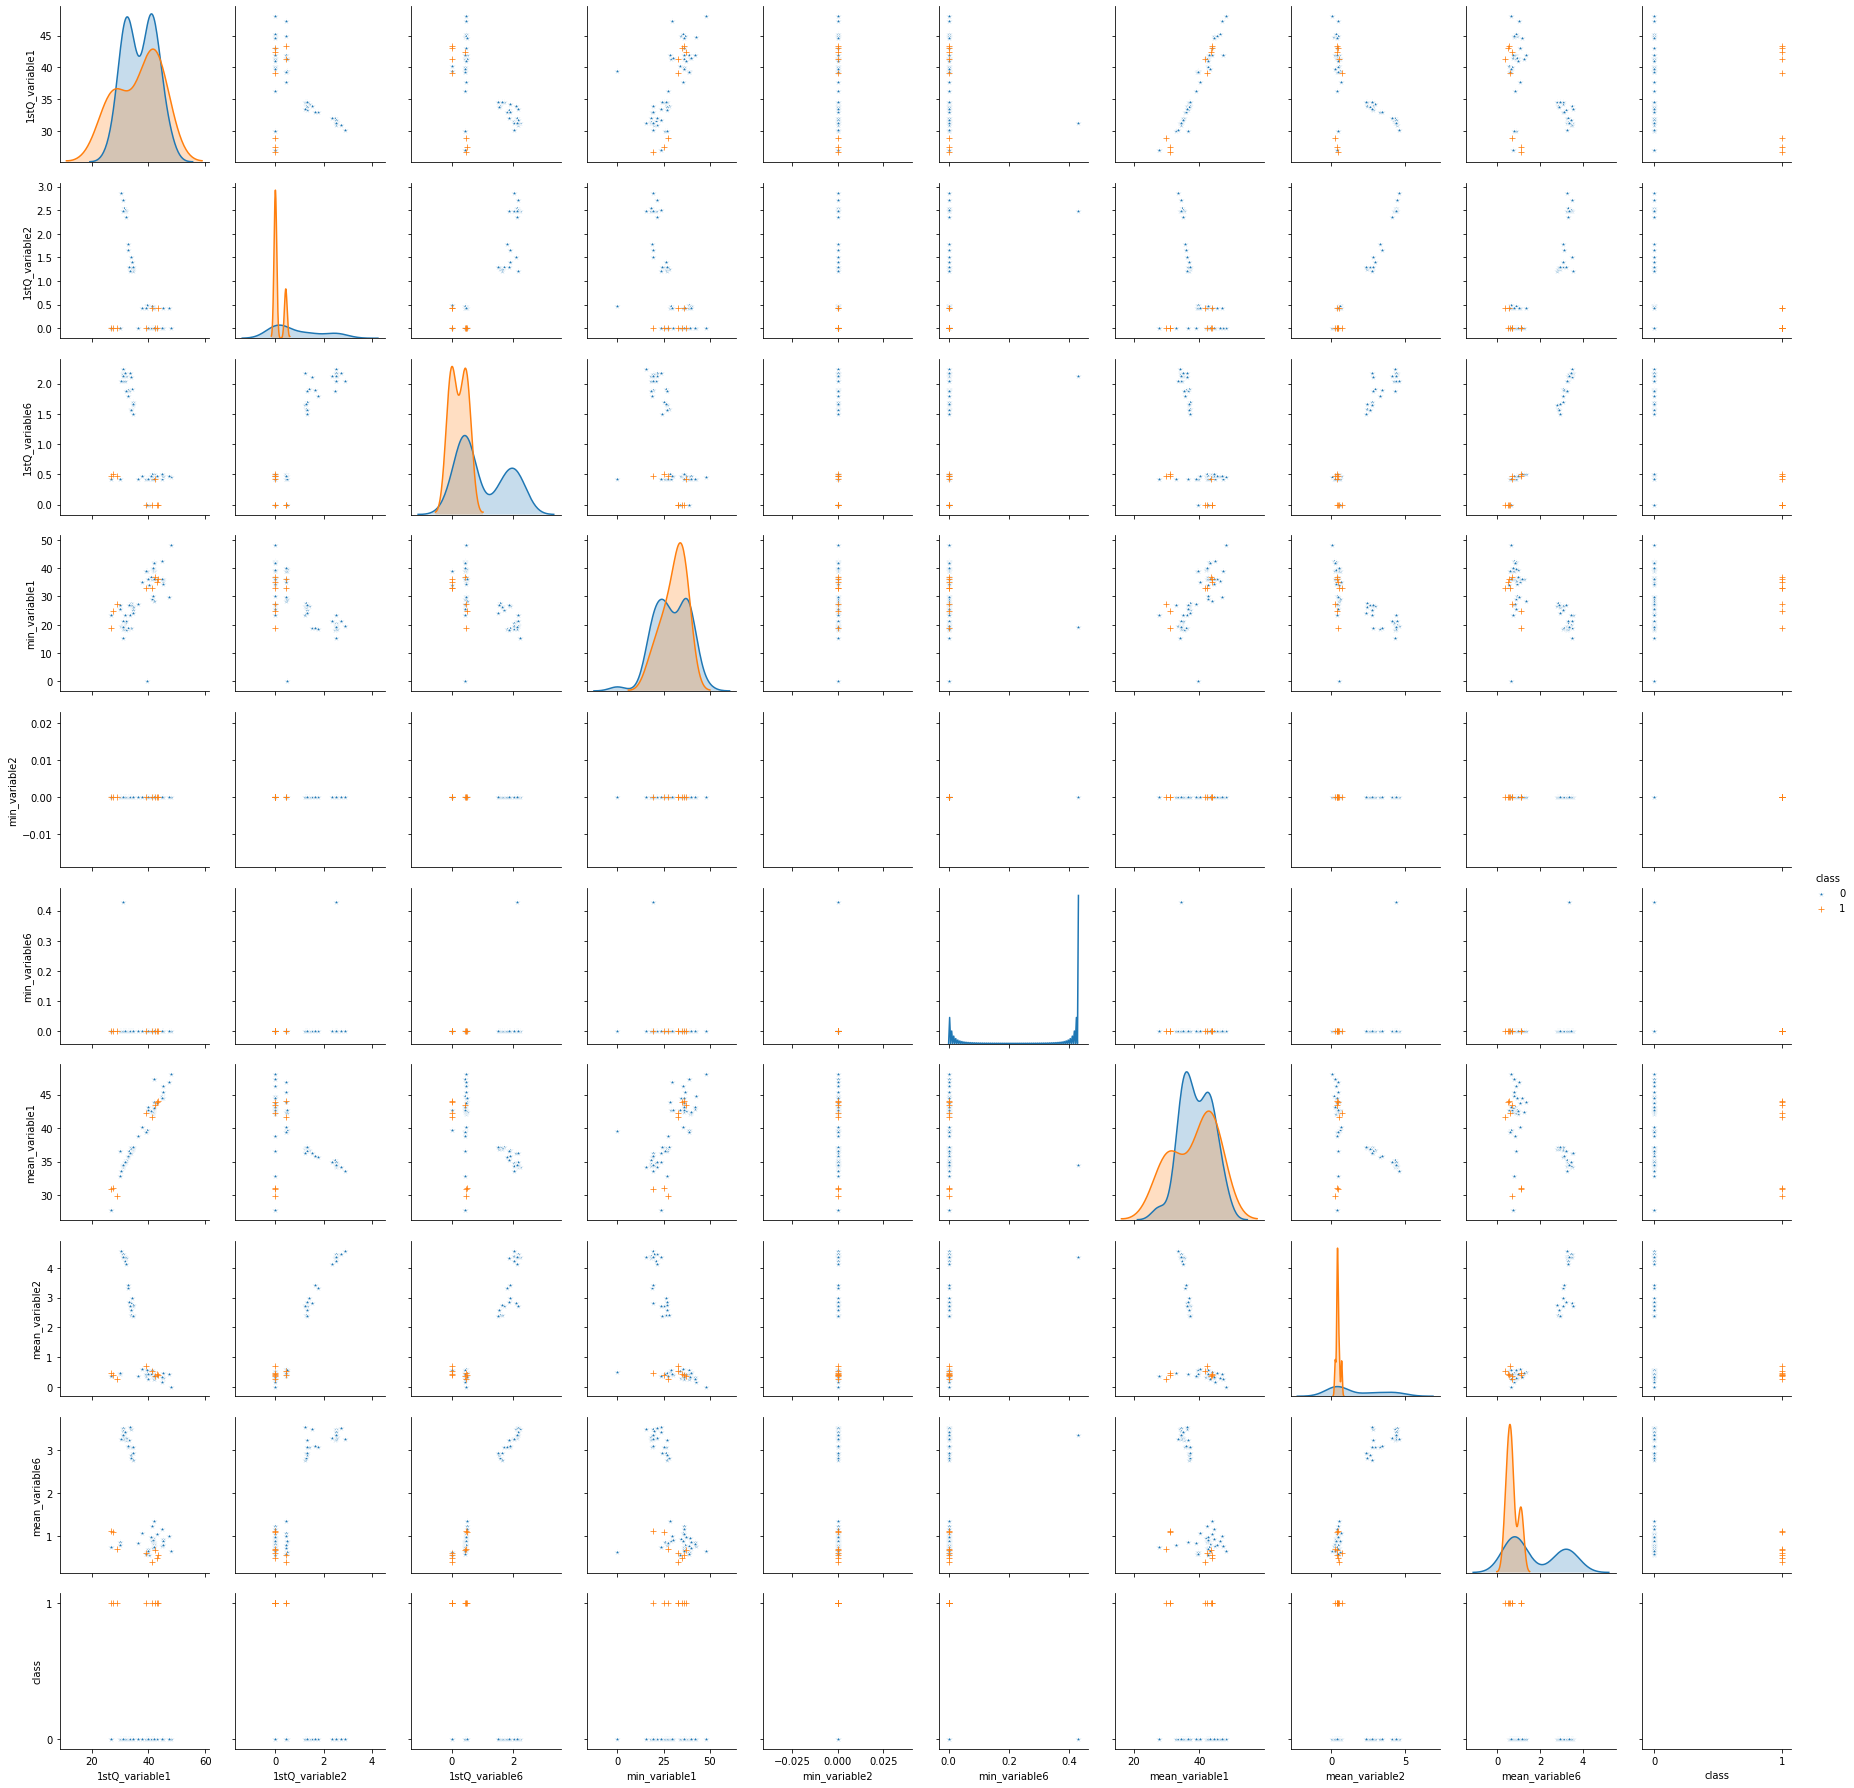

In [19]:
sns.pairplot(extract_train, hue="class", markers=["*", "+"])

## d(ii). Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 1(d)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 12. Do you see any considerable difference in the results with those of 1(d)i?

In [20]:
column_new_train=list()
features=['min', 'max', 'mean', '50%', 'std', '25%', '75%']
#column name
for i in range(12):
    column_new_train_temp="Variable"+str(i+1)
    for j in range(7):
        column_new_train_temp_features=column_new_train_temp+'_'+features[j]
        column_new_train.append(column_new_train_temp_features)

In [21]:
#reshape training data
new_train=[]
for instance in train_data:
    new_instance=instance.values.reshape(-1,12)
    new_train_data=pd.DataFrame(data=new_instance)
    new_train.append(new_train_data)

#index name
new_train_index=[]

for number in range(20):
    ind='Instance'+str(number+1)
    new_train_index.append(ind)


In [22]:
#calculated features
Result_new=[]
for instance in new_train:
    train_feature_temp = instance.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    Result_new.append(pd.DataFrame(train_feature_temp.to_numpy().reshape(1,84)))
train_set_mutifeature = pd.concat(Result_new)
train_set_mutifeature.index=train_index


In [23]:
train_set_mutifeature.head()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
Instance1,35.0,47.33,43.955917,44.415,1.568614,43.0000,45.00,0.0,1.48,0.427208,...,1.995943,35.3625,36.5000,0.0,1.79,0.515042,0.45,0.521502,0.00,1.00
Instance2,33.0,47.75,42.194083,43.710,3.683760,39.2475,45.00,0.0,2.49,0.687833,...,3.869979,30.6275,36.3725,0.0,2.18,0.635208,0.50,0.538102,0.00,1.00
Instance3,34.0,45.75,41.691042,41.750,2.218678,41.3300,42.75,0.0,2.83,0.544750,...,2.386869,28.5000,31.2500,0.0,1.50,0.387208,0.43,0.388919,0.00,0.50
Instance4,37.0,47.25,43.464583,43.290,1.403855,42.5000,45.00,0.0,1.58,0.378417,...,2.515385,22.3100,24.0000,0.0,5.26,0.690042,0.50,0.710628,0.43,0.87
Instance5,36.5,48.00,43.969292,44.500,1.619846,43.3300,44.67,0.0,1.25,0.410667,...,3.311452,20.5000,23.7500,0.0,2.69,0.555000,0.50,0.464668,0.00,0.83


In [24]:
train_set_mutifeature.columns=column_new_train

train_set_mutifeature['label']=train_label
train_set_mutifeature['class'] = np.where(train_set_mutifeature['label']=='bending', '1', '0')

In [25]:
train_set_mutifeature.head()

,Variable1_min,Variable1_max,Variable1_mean,Variable1_50%,Variable1_std,Variable1_25%,Variable1_75%,Variable2_min,Variable2_max,Variable2_mean,...,Variable11_75%,Variable12_min,Variable12_max,Variable12_mean,Variable12_50%,Variable12_std,Variable12_25%,Variable12_75%,label,class
Instance1,35.0,47.33,43.955917,44.415,1.568614,43.0000,45.00,0.0,1.48,0.427208,...,36.5000,0.0,1.79,0.515042,0.45,0.521502,0.00,1.00,bending,1
Instance2,33.0,47.75,42.194083,43.710,3.683760,39.2475,45.00,0.0,2.49,0.687833,...,36.3725,0.0,2.18,0.635208,0.50,0.538102,0.00,1.00,bending,1
Instance3,34.0,45.75,41.691042,41.750,2.218678,41.3300,42.75,0.0,2.83,0.544750,...,31.2500,0.0,1.50,0.387208,0.43,0.388919,0.00,0.50,bending,1
Instance4,37.0,47.25,43.464583,43.290,1.403855,42.5000,45.00,0.0,1.58,0.378417,...,24.0000,0.0,5.26,0.690042,0.50,0.710628,0.43,0.87,bending,1
Instance5,36.5,48.00,43.969292,44.500,1.619846,43.3300,44.67,0.0,1.25,0.410667,...,23.7500,0.0,2.69,0.555000,0.50,0.464668,0.00,0.83,bending,1


In [26]:
#Pick Variable 1,2 and 6 with their 1st Quartile ,min and Mean
filtered_train=train_set_mutifeature[['Variable1_25%','Variable2_25%','Variable12_25%','Variable1_min','Variable2_min','Variable12_min',\
                                    'Variable1_mean','Variable2_mean','Variable12_mean','class']]

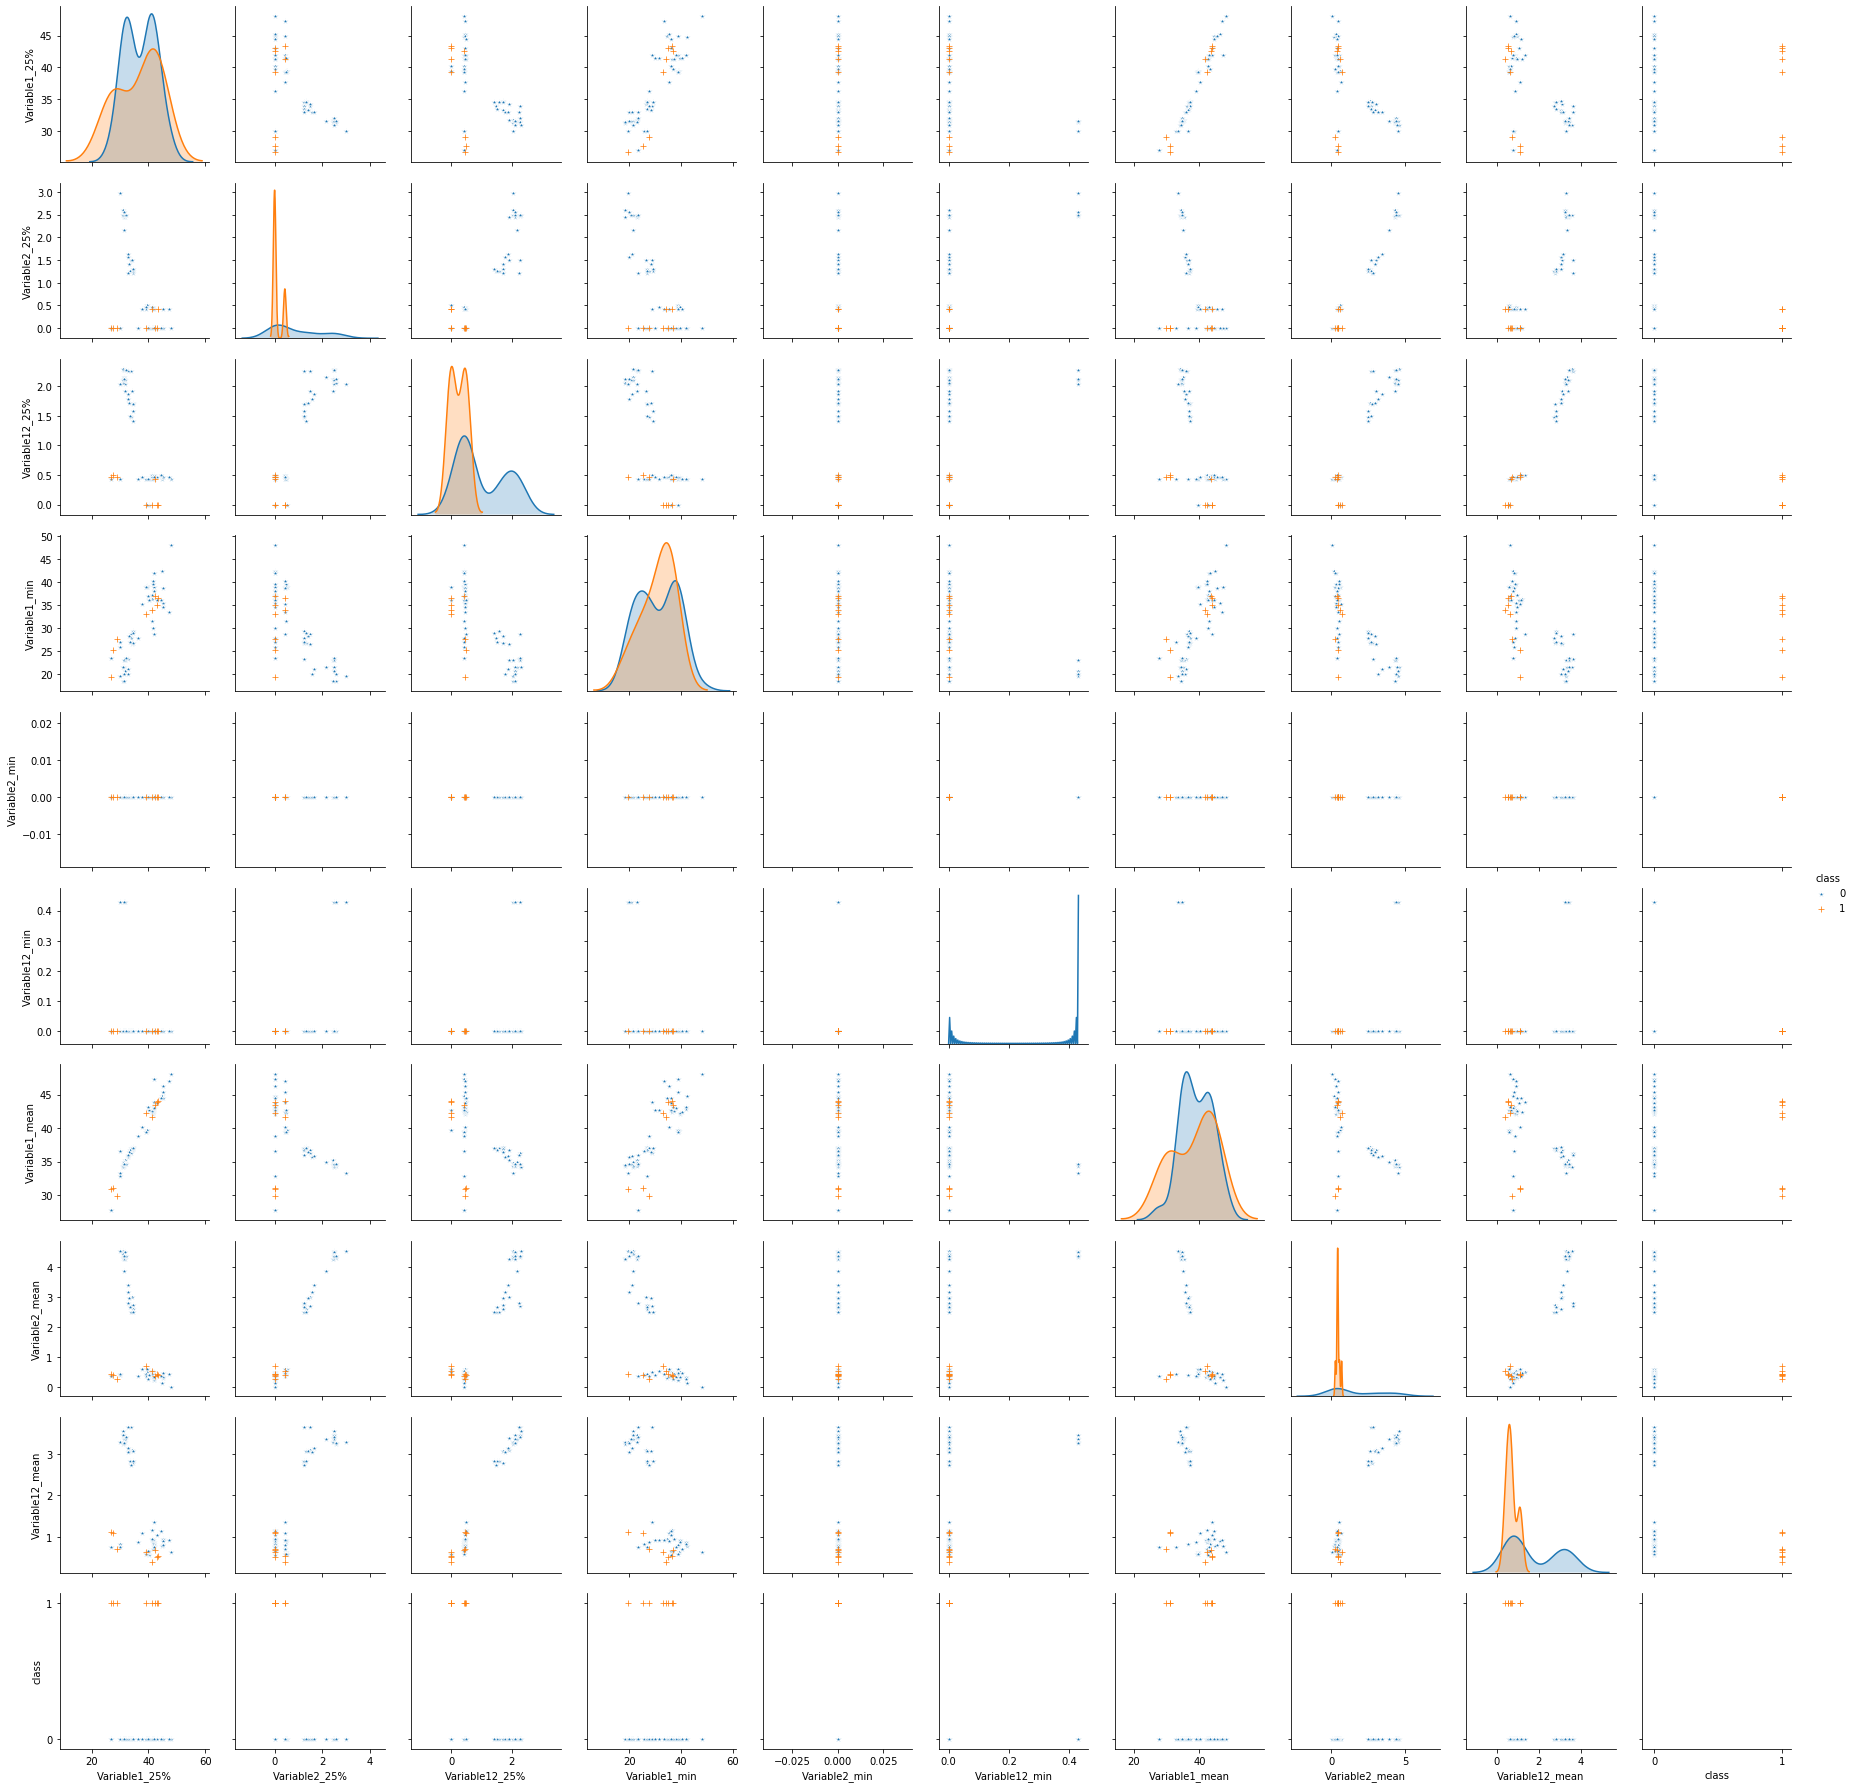

In [27]:
sns.pairplot(filtered_train, hue="class", markers=["*", "+"])

I don't see considerable difference between part d(i)

### d(iii) Break each time series in your training set into l∈ {1,2, . . . ,20} time series of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features.

In [28]:
l=np.arange(1,21)
#check if 480x6 matrix can be reshaped
l_update=[]
rows=np.arange(1,481)
row_update=[]
for column in l*6:
    for row in rows:
        if row*column == 480*6:
            row_update.append(row)
            l_update.append(column)
        else:
            continue
print('Dataset can be reshaped as',l_update,'columns')

Dataset can be reshaped as [6, 12, 18, 24, 30, 36, 48, 60, 72, 90, 96, 120] columns


In [29]:
#column name
column_split=list()
features=['min', 'max', 'mean', '50%', 'std', '25%', '75%']
for l in l_update:
    for i in range(l):
        column_new_train_temp="Variable"+str(i+1)
        for j in range(7):
            column_new_train_temp_features=column_new_train_temp+'_'+features[j]
            column_split.append(column_new_train_temp_features)

In [30]:
# Gathering above steps as a function for future use
def reshape(instance):
    instance_reshape=[]
    for l in l_update:
            instance1_reshape=instance.values.reshape(-1,l)
            new_instance1_reshape=pd.DataFrame(data=instance1_reshape)
            instance_reshape.append(new_instance1_reshape)
    return instance_reshape

In [31]:
def reshape_features(instance_reshape):
    reshape_features=[]
    for each in instance_reshape:
        feature=each.describe().T[['min', 'mean', '25%']].reset_index(drop=True)
        df=pd.DataFrame(feature.to_numpy().reshape(1,-1))
        reshape_features.append(df)
    return reshape_features

In [32]:
def combine_Data(train_data):
    instance_reshape_train=[]
    reshape_features_train=[]
    for instance in train_data:
        instance_reshape_train.append(reshape(instance))
    for instance_reshape in instance_reshape_train:
        reshape_features_train.append(reshape_features(instance_reshape))
    return reshape_features_train

In [33]:
def make_Data (reshape_features_train,l_update,train_label):
    Data=[]
    for j in range(len(l_update)):
        Variable=[]
        for i in range(len(reshape_features_train)):
            Variable.append(reshape_features_train[i][j])
#variable=[variable6[0],variable6[1],variable6[18]]

        data=pd.concat(Variable)
        data['label']=train_label
        data['class'] = np.where(data['label']=='bending', '1', '0')
        data=data.drop(columns='label')
        Data.append(data)
    return Data


### Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features.Alternatively, you can use backward selection using sklearn.feature selection or glm in R

Here I'm using sklearn feature selection method:

In [34]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
def select_p(data):
    X=data.iloc[:,:-1].values
    Y=data.iloc[:,-1].values.astype(int)
    model = LogisticRegression(solver='lbfgs')
    rfe = RFE( model , 1)
    rfe = rfe.fit(X,Y)
    #print(rfe.support_)
    numb=rfe.ranking_
    
    return numb


In [35]:
#Citation: https://tedboy.github.io/statsmodels_doc/generated/generated/statsmodels.api.Logit.fit.html       
from sklearn.preprocessing import MinMaxScaler
#Creare function to get p values for future use
import statsmodels.api as sm
def get_logit_pvalues(Data):
    scaler = MinMaxScaler().fit(Data)
    data=scaler.transform(Data)
    X_g=data[:,:-1]
    Y_g=data[:,-1].astype(int)
    logit_model=sm.Logit(Y_g,X_g)
    result=logit_model.fit(method = 'bfgs',maxiter=100)
    return print(result.summary())

In [36]:
column_name=list()
features=['min',  'mean',  '25%']
for l in l_update:
    for i in range(l):
        column_temp="Variable"+str(i+1)
        for j in range(3):
            column_temp_features=column_temp+'_'+features[j]
            column_name.append(column_temp_features)            

In [37]:
train_Data=make_Data(combine_Data(train_data),l_update,train_label)
select=[]
index=[]
name=[]
for i in range(12):
    select.append(select_p(train_Data[i]))
    index_temp = list(x for x, val in enumerate(select[i]) 
                                  if val == 1) 
    index.append(index_temp)
    name.append(column_name[index[i][0]])


In [38]:
summary= {'# of variable': l_update, 
        'Best variable index': index, 
        'variable name': name} 
summary_table=pd.DataFrame(summary)
summary_table

,# of variable,Best variable index,variable name
0,6,[4],Variable2_mean
1,12,[22],Variable2_mean
2,18,[40],Variable8_mean
3,24,[22],Variable2_mean
4,30,[85],Variable11_mean
5,36,[67],Variable5_mean
6,48,[31],Variable5_mean
7,60,[31],Variable5_mean
8,72,[49],Variable11_mean
9,90,[103],Variable17_mean


### Use 5-fold cross-validation to determine the best value of the pair(l, p), where p is the number of features used in recursive feature elimination.

In [39]:
#Citations:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

#Make data
train_fea=combine_Data(train_data)
Dataset=make_Data (train_fea,l_update,train_label)
def cvscores(Dataset):
    scores=[]
    from sklearn.model_selection import cross_val_score
    for i in range(len(Dataset)):
        model=LogisticRegression()
        X1=Dataset[i].iloc[:,:-1].values
        Y1=Dataset[i].iloc[:,-1].values.astype(int)
        scores_temp = cross_val_score(model, X1, Y1, cv=5,n_jobs=-1)
        scores.append(scores_temp.mean())
    return scores
scores=cvscores(Dataset)

In [40]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
def selec_feature(Dataset):
    rfecv_features_=[]
    for i in range(len(Dataset)):
        X1=Dataset[i].iloc[:,:-1].values
        Y1=Dataset[i].iloc[:,-1].values.astype(int)
        model=LogisticRegression()
        rfecv = RFECV(estimator=model,cv=StratifiedKFold(5),
              scoring='accuracy',n_jobs=-1)
        rfecv.fit(X1, Y1)
        rfecv_features_.append(rfecv.n_features_)
    return rfecv_features_
rfecv_features_=selec_feature(Dataset)

In [41]:
choose=pd.DataFrame()
l=[]
for i in l_update:
    l.append(i/6)
choose['l values(L)']=l
choose['# of Variable']=l_update
choose['CV scores']=scores
choose['# of features(p)']=rfecv_features_

choose

,l values(L),# of Variable,CV scores,# of features(p)
0,1.0,6,0.897802,7
1,2.0,12,0.926374,10
2,3.0,18,0.913187,28
3,4.0,24,0.898901,5
4,5.0,30,0.898901,4
5,6.0,36,0.912088,4
6,8.0,48,0.941758,53
7,10.0,60,0.927473,107
8,12.0,72,0.926374,2
9,15.0,90,0.941758,8


Based on my result, the best (L,P) can be (8,53),(15,8),(16,10)

### Explain what the right way and the wrong way are to perform cross-validation in this problem.

* The right way to do cross validation is to include the feature screening process in the cross validation as well.
* The wrong way to do cross validation is to apply it on the feature-selected model.

### d(iv)Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.

Here I choose reporting when l=8 because it has highest cv accurancy.(As shown in table above)

In [90]:
get_logit_pvalues(Dataset[6])

Optimization terminated successfully.
         Current function value: 0.000045
         Iterations: 41
         Function evaluations: 42
         Gradient evaluations: 42
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   68
Model:                          Logit   Df Residuals:                        3
Method:                           MLE   Df Model:                           64
Date:                Fri, 09 Oct 2020   Pseudo R-squ.:                  0.9999
Time:                        18:15:10   Log-Likelihood:             -0.0030545
converged:                       True   LL-Null:                       -24.630
Covariance Type:            nonrobust   LLR p-value:                    0.9130
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -28.1853        nan      

/Users/caroline/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [91]:
X_2=Dataset[6].iloc[:,:-1].values
Y_2=Dataset[6].iloc[:,-1].values.astype(int)
from sklearn.linear_model import LogisticRegression
logregssion = LogisticRegression()

# fit the model with data
logregssion.fit(X_2,Y_2)

#
y_pred=logregssion.predict(X_2)

In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_2, y_pred)

array([[60,  0],
       [ 0,  8]])

In [93]:
from sklearn.metrics import roc_curve, auc
FP, TP, thresholds = roc_curve(Y_2, y_pred)
area = auc(FP, TP)

Text(0, 0.5, 'True Postive')

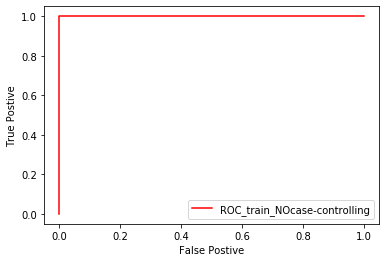

In [94]:
import matplotlib.pyplot as plt

plt.plot(FP,TP, color='red', label='ROC_train_NOcase-controlling')
plt.legend()
plt.xlabel('False Postive')
plt.ylabel('True Postive')

### d(v) Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously

In [47]:
l=np.arange(1,21)
#check if 480x6 matrix can be reshaped
l_update=[]
rows=np.arange(1,481)
row_update=[]
for column in l*6:
    for row in rows:
        if row*column == 480*6:
            row_update.append(row)
            l_update.append(column)
        else:
            continue
print('Dataset can be reshaped as',l_update,'columns')

Dataset can be reshaped as [6, 12, 18, 24, 30, 36, 48, 60, 72, 90, 96, 120] columns


In [48]:
Test=combine_Data(test_data)
TestDataset=make_Data (Test,l_update,test_label)
cv_Test=cvscores(TestDataset)

In [49]:
rfecv_Tesr_feature=selec_feature(TestDataset)

In [50]:
from sklearn.linear_model import LogisticRegression
test_score=[]
for i in range(len(TestDataset)):
        X_t=TestDataset[i].iloc[:,:-1].values
        Y_t=TestDataset[i].iloc[:,-1].values.astype(int)
        logregssion = LogisticRegression()
        logregssion.fit(X_t,Y_t)
        y_test_pred=logregssion.predict(X_t)
        test_score.append(logregssion.score(X_t,Y_t))


In [51]:
test_summary=pd.DataFrame()
l_value=[]
for i in l_update:
    l_value.append(i/6)
test_summary['l values(L)']=l_value
test_summary['# of Variable']=l_update
test_summary['CV scores from train']=scores
test_summary['Accurancy']=test_score
test_summary['# of features(p)']=rfecv_Tesr_feature

test_summary

,l values(L),# of Variable,CV scores from train,Accurancy,# of features(p)
0,1.0,6,0.897802,1.0,2
1,2.0,12,0.926374,1.0,2
2,3.0,18,0.913187,1.0,2
3,4.0,24,0.898901,1.0,2
4,5.0,30,0.898901,1.0,2
5,6.0,36,0.912088,1.0,1
6,8.0,48,0.941758,1.0,2
7,10.0,60,0.927473,1.0,2
8,12.0,72,0.926374,1.0,1
9,15.0,90,0.941758,1.0,1


The test dataset has higher accurancy than preiviously cross-validation scores of train dataset

### d(vi) Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

* Yes.

### d(vii) From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

Yes, we have imbalanced classes. Here I took when l=2 to do SMOTE resampling for Test data

In [52]:
X_t2=TestDataset[1].iloc[:,:-1].values
Y_t2=TestDataset[1].iloc[:,-1].values.astype(int)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=2,k_neighbors=4)
X_testsm, Y_testsm = smote.fit_sample(X_t2,Y_t2.ravel())

In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_testsm,Y_testsm)
pred_Y=logreg.predict(X_testsm)

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_testsm, pred_Y)

array([[15,  0],
       [ 0, 15]])

In [55]:
from sklearn.metrics import roc_curve, auc
FP2, TP2, thresholds2 = roc_curve(Y_testsm, pred_Y)
area = auc(FP2,TP2)

Text(0, 0.5, 'True Postive')

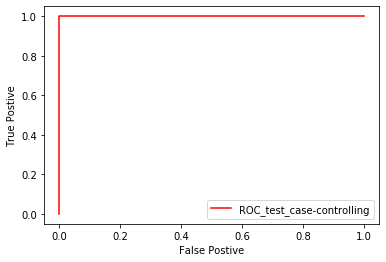

In [56]:
import matplotlib.pyplot as plt

plt.plot(FP2, TP2, color='red', label='ROC_test_case-controlling')
plt.legend()
plt.xlabel('False Postive')
plt.ylabel('True Postive')

Here I choose L=2 fro SMOTE Train data

In [57]:
X_d2=Dataset[1].iloc[:,:-1].values
Y_d2=Dataset[1].iloc[:,-1].values.astype(int)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=2,k_neighbors=3)
X_trainsm, Y_trainsm = smote.fit_sample(X_d2,Y_d2.ravel())
pred_Y_train=logreg.predict(X_trainsm)
confusion_matrix(Y_trainsm, pred_Y_train)

array([[60,  0],
       [27, 33]])

In [58]:
from sklearn.metrics import roc_curve, auc
FP2, TP2, threshold2 = roc_curve(Y_trainsm, pred_Y_train)
area2 = auc(FP2, TP2)

Text(0, 0.5, 'True Postive')

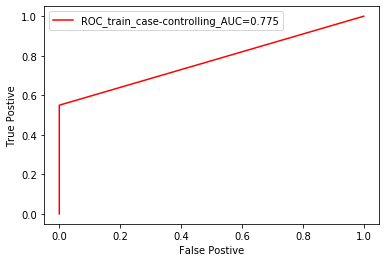

In [59]:
plt.plot(FP2, TP2, color='red', label='ROC_train_case-controlling_'+'AUC='+str(area2))
plt.legend()
plt.xlabel('False Postive')
plt.ylabel('True Postive')

### (e)Binary Classification Using L1-penalized logistic regression

Repeat 1(d)iii using L1-penalized logistic regression

In [60]:
from sklearn.linear_model import LogisticRegression
def L1_penalized(Data):
    scaler = MinMaxScaler().fit(Data)
    data=scaler.transform(Data)
    X_=data[:,:-1]
    Y_=data[:,-1].astype(int)
    L1regression = LogisticRegression(penalty='l1',n_jobs=-1,solver='liblinear')
    result=L1regression.fit(X_,Y_)
    return L1regression.score(X_, Y_)

In [61]:
L1score=[]
rfecv_features_L1=[]
for i in range(len(Dataset)):
    temp=L1_penalized(Dataset[i])
    L1score.append(temp)
    X_i=Dataset[i].iloc[:,:-1].values
    Y_i=Dataset[i].iloc[:,-1].values.astype(int)
    L1regression = LogisticRegression(penalty='l1',n_jobs=-1,solver='liblinear')
    rfecv = RFECV(estimator=L1regression,cv=StratifiedKFold(5),
              scoring='accuracy',n_jobs= -1)
    rfecv.fit(X_i, Y_i)
    rfecv_features_L1.append(rfecv.n_features_)

In [62]:
summary_Train=pd.DataFrame()
summary_Train['l value']=l_value
summary_Train['L1 score']=L1score
summary_Train['# of features']=rfecv_features_L1
summary_Train

,l value,L1 score,# of features
0,1.0,0.926471,3
1,2.0,0.926471,3
2,3.0,0.941176,3
3,4.0,0.926471,4
4,5.0,0.926471,3
5,6.0,0.941176,5
6,8.0,0.926471,10
7,10.0,0.926471,3
8,12.0,0.941176,2
9,15.0,0.926471,75


### e(ii) Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement

By comcaring the accurancy, the L1 penalized regression perfomred high accurancies than p-value regression. Also, I think L-1 penalized regression implment more easier. P-value selection suffered from "perfect separation". To deal this problm, the backward selection method was used, but it increased the computing time as features become larger. 

### f(i) Multi-class Classification (The Realistic Case)

the best l in the same way as you found it in 1(e)i to build an L1- penalized multinomial regression model to classify all activities in your training set. Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible

In [63]:
#Citation: #https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#plot-roc-curves-for-the-multilabel-problem

from sklearn.preprocessing import LabelEncoder
    
def make_muticlassData (reshape_features_train,l_update,train_label):
    Data=[]
    for j in range(len(l_update)):
        Variable=[]
        for i in range(len(reshape_features_train)):
            Variable.append(reshape_features_train[i][j])


        data=pd.concat(Variable)
        data['label']=train_label
        labelE = LabelEncoder()
        data['label'] = labelE.fit_transform(data['label'])
        Data.append(data)
    return Data


In [64]:
Muti=combine_Data(train_data)
Muti_train=make_muticlassData(Muti,l_update,train_label)

In [65]:
from sklearn.linear_model import LogisticRegressionCV
def muti_L1_penalized(Data):
    X_=Data.iloc[:,:-1]
    Y_=Data.iloc[:,-1].astype(int)
    L1regression = LogisticRegressionCV(penalty='l1',n_jobs=-1,solver='saga',multi_class='multinomial',cv=5)
    result=L1regression.fit(X_,Y_)
    return L1regression.score(X_, Y_)

In [66]:
Muti_L1score=[]
for i in range(len(Muti_train)):
    temp=muti_L1_penalized(Muti_train[i])
    Muti_L1score.append(1-temp) 

In [67]:
Muti_Train=pd.DataFrame()
Muti_Train['l values']=l_value
Muti_Train['Muti L1 regression error']=Muti_L1score
Muti_Train

,l values,Muti L1 regression error
0,1.0,0.117647
1,2.0,0.102941
2,3.0,0.088235
3,4.0,0.117647
4,5.0,0.102941
5,6.0,0.102941
6,8.0,0.102941
7,10.0,0.058824
8,12.0,0.058824
9,15.0,0.058824


In [68]:
# Get the confusion matrix choose L=2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import multilabel_confusion_matrix
data_mu1=Muti_train[1]
X_mu1=data_mu1.iloc[:,:-1]
Y_mu1=data_mu1.iloc[:,-1].astype(int)
L1regression = LogisticRegression(penalty='l1',n_jobs=-1,solver='saga',multi_class='multinomial')
L1regression.fit(X_mu1,Y_mu1)
Y_muti_predic = L1regression.predict(X_mu1)
multilabel_confusion_matrix(Y_mu1.values, Y_muti_predic )#confusion matrix through class 0-5

array([[[58,  2],
        [ 1,  7]],

       [[56,  0],
        [ 2, 10]],

       [[54,  2],
        [ 0, 12]],

       [[51,  5],
        [ 5,  7]],

       [[55,  1],
        [ 4,  8]],

       [[54,  2],
        [ 0, 12]]])

In [69]:
from sklearn.metrics import roc_curve, auc
FP, TP, threshold = roc_curve(Y_mu1, Y_muti_predic,pos_label=5)
roc_auc_ = auc(FP, TP)

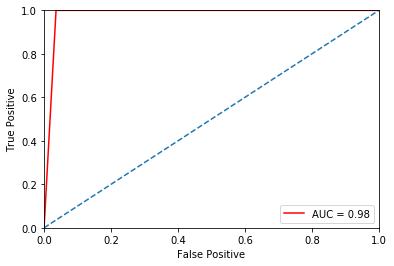

In [70]:
plt.plot(FP, TP, 'R', label = 'AUC = %0.2f' % roc_auc_)
plt.plot([0, 1], [0, 1],'--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.legend()

### f(ii) Repeat 1(f)i using a Na ̈ıve Bayes’ classifier. Use both Gaussian and Multinomial priors and compare the results.

Gaussian

In [71]:
from sklearn.naive_bayes import GaussianNB
def muti_Gaussian(Data):
    scores=[]
    from sklearn.model_selection import cross_val_score
    for i in range(len(Dataset)):
        model= GaussianNB()
        X1=Dataset[i].iloc[:,:-1].values
        Y1=Dataset[i].iloc[:,-1].values.astype(int)
        scores_temp = cross_val_score(model, X1, Y1, cv=5,n_jobs=-1)
        scores.append(scores_temp.mean())
    return scores
G_scores=muti_Gaussian(Muti_train)

In [72]:
Muti_Train_g=pd.DataFrame()
Muti_Train_g['l values']=l_value
Muti_Train_g['Muti NB Gaussian scores']=G_scores
Muti_Train_g

,l values,Muti NB Gaussian scores
0,1.0,0.457143
1,2.0,0.472527
2,3.0,0.501099
3,4.0,0.472527
4,5.0,0.558242
5,6.0,0.586813
6,8.0,0.501099
7,10.0,0.648352
8,12.0,0.575824
9,15.0,0.693407


Choose L=20 to report confustion matrix and ROC/AUC

In [73]:
data_mu20=Muti_train[11]
X_mu20=data_mu1.iloc[:,:-1]
Y_mu20=data_mu1.iloc[:,-1]
model= GaussianNB().fit(X_mu20,Y_mu20)
Y_mu20_predic = model.predict(X_mu20)

from sklearn.metrics import multilabel_confusion_matrix
NBG=multilabel_confusion_matrix(Y_mu20.values, Y_mu20_predic )#confusion matrix through class 0-5
NBG

array([[[60,  0],
        [ 2,  6]],

       [[56,  0],
        [ 0, 12]],

       [[55,  1],
        [ 0, 12]],

       [[52,  4],
        [ 2, 10]],

       [[55,  1],
        [ 2, 10]],

       [[56,  0],
        [ 0, 12]]])

In [74]:
import sklearn.metrics as metrics
falsepr20, truepr20, threshold20 = metrics.roc_curve(Y_mu20, Y_mu20_predic,pos_label=5)
roc_auc20 = metrics.auc(falsepr20, truepr20)

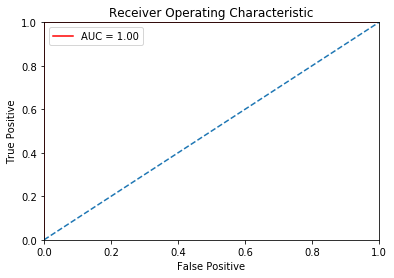

In [75]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(falsepr20, truepr20, color='red', label = 'AUC = %0.2f' % roc_auc20)
plt.plot([0, 1], [0, 1],'--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.legend()

Multi-nomial

In [76]:
from sklearn.naive_bayes import MultinomialNB
def MutiNB(Data):
    scores=[]
    from sklearn.model_selection import cross_val_score
    for i in range(len(Dataset)):
        model= MultinomialNB()
        clf=model
        X1=Dataset[i].iloc[:,:-1].values
        Y1=Dataset[i].iloc[:,-1].values.astype(int)
        scores_temp = cross_val_score(clf, X1, Y1, cv=5,n_jobs=-1)
        scores.append(scores_temp.mean())
    return scores
M_scores=MutiNB(Muti_train)

In [95]:
Muti_Train_MNB=pd.DataFrame()
Muti_Train_MNB['l values']=l_value
Muti_Train_MNB['Mutinomial NB  scores']=M_scores
Muti_Train_MNB

,l values,Mutinomial NB scores
0,1.0,0.940659
1,2.0,0.940659
2,3.0,0.941758
3,4.0,0.927473
4,5.0,0.941758
5,6.0,0.927473
6,8.0,0.927473
7,10.0,0.927473
8,12.0,0.927473
9,15.0,0.927473


Choose L=6 to report confustion matrix and ROC/AUC

In [78]:
data_mu6=Muti_train[5]
X_mu6=data_mu6.iloc[:,:-1]
Y_mu6=data_mu6.iloc[:,-1]
model2= MultinomialNB().fit(X_mu6,Y_mu6)
Y_mu6_predic = model2.predict(X_mu6)

from sklearn.metrics import multilabel_confusion_matrix
MNB=multilabel_confusion_matrix(Y_mu6.values, Y_mu6_predic )#confusion matrix through class 0-5
MNB

array([[[59,  1],
        [ 2,  6]],

       [[56,  0],
        [ 1, 11]],

       [[54,  2],
        [ 0, 12]],

       [[51,  5],
        [ 5,  7]],

       [[53,  3],
        [ 4,  8]],

       [[55,  1],
        [ 0, 12]]])

In [79]:
import sklearn.metrics as metrics
falsepr6, truepr6, threshold6 = metrics.roc_curve(Y_mu6, Y_mu6_predic,pos_label=5)
roc_auc6 = metrics.auc(falsepr6, truepr6)

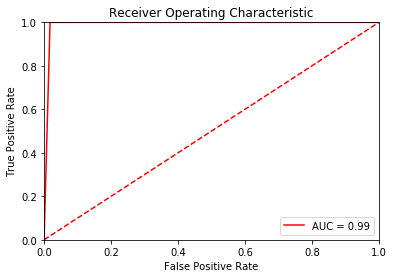

In [80]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(falsepr6, truepr6, color='red', label = 'AUC = %0.2f' % roc_auc6)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### f(iii).Which method is better for multi-class classification in this problem?

For all possible L values, the multinomial Naive bayes performs better(Highest Accurancy=0.94), comparing to the Gaussian Naive baye(Highest Accurancy = 0.79). When choose the best L and refill to the model, the multinomial has AUC =0.99, and Gausian has AUC =1, which did not make big difference. All in all ,I think Muitinomial Naive bayes is better.

### ISLR 3.7.4

a. The RSS from linear regression would be lower than cubic regression, since the true relation between X and Y is linear.

b. I think it depends on how test dataset looks like. However, I assume cubic regression will still have higher RSS since it overfits the data.

c. I would expect cubic regression has lowers RSS because of higher flexibility.

d. It still depends on how test data looks like. I would expect cubic regression has lower RSS based on bia-variance trade-off.

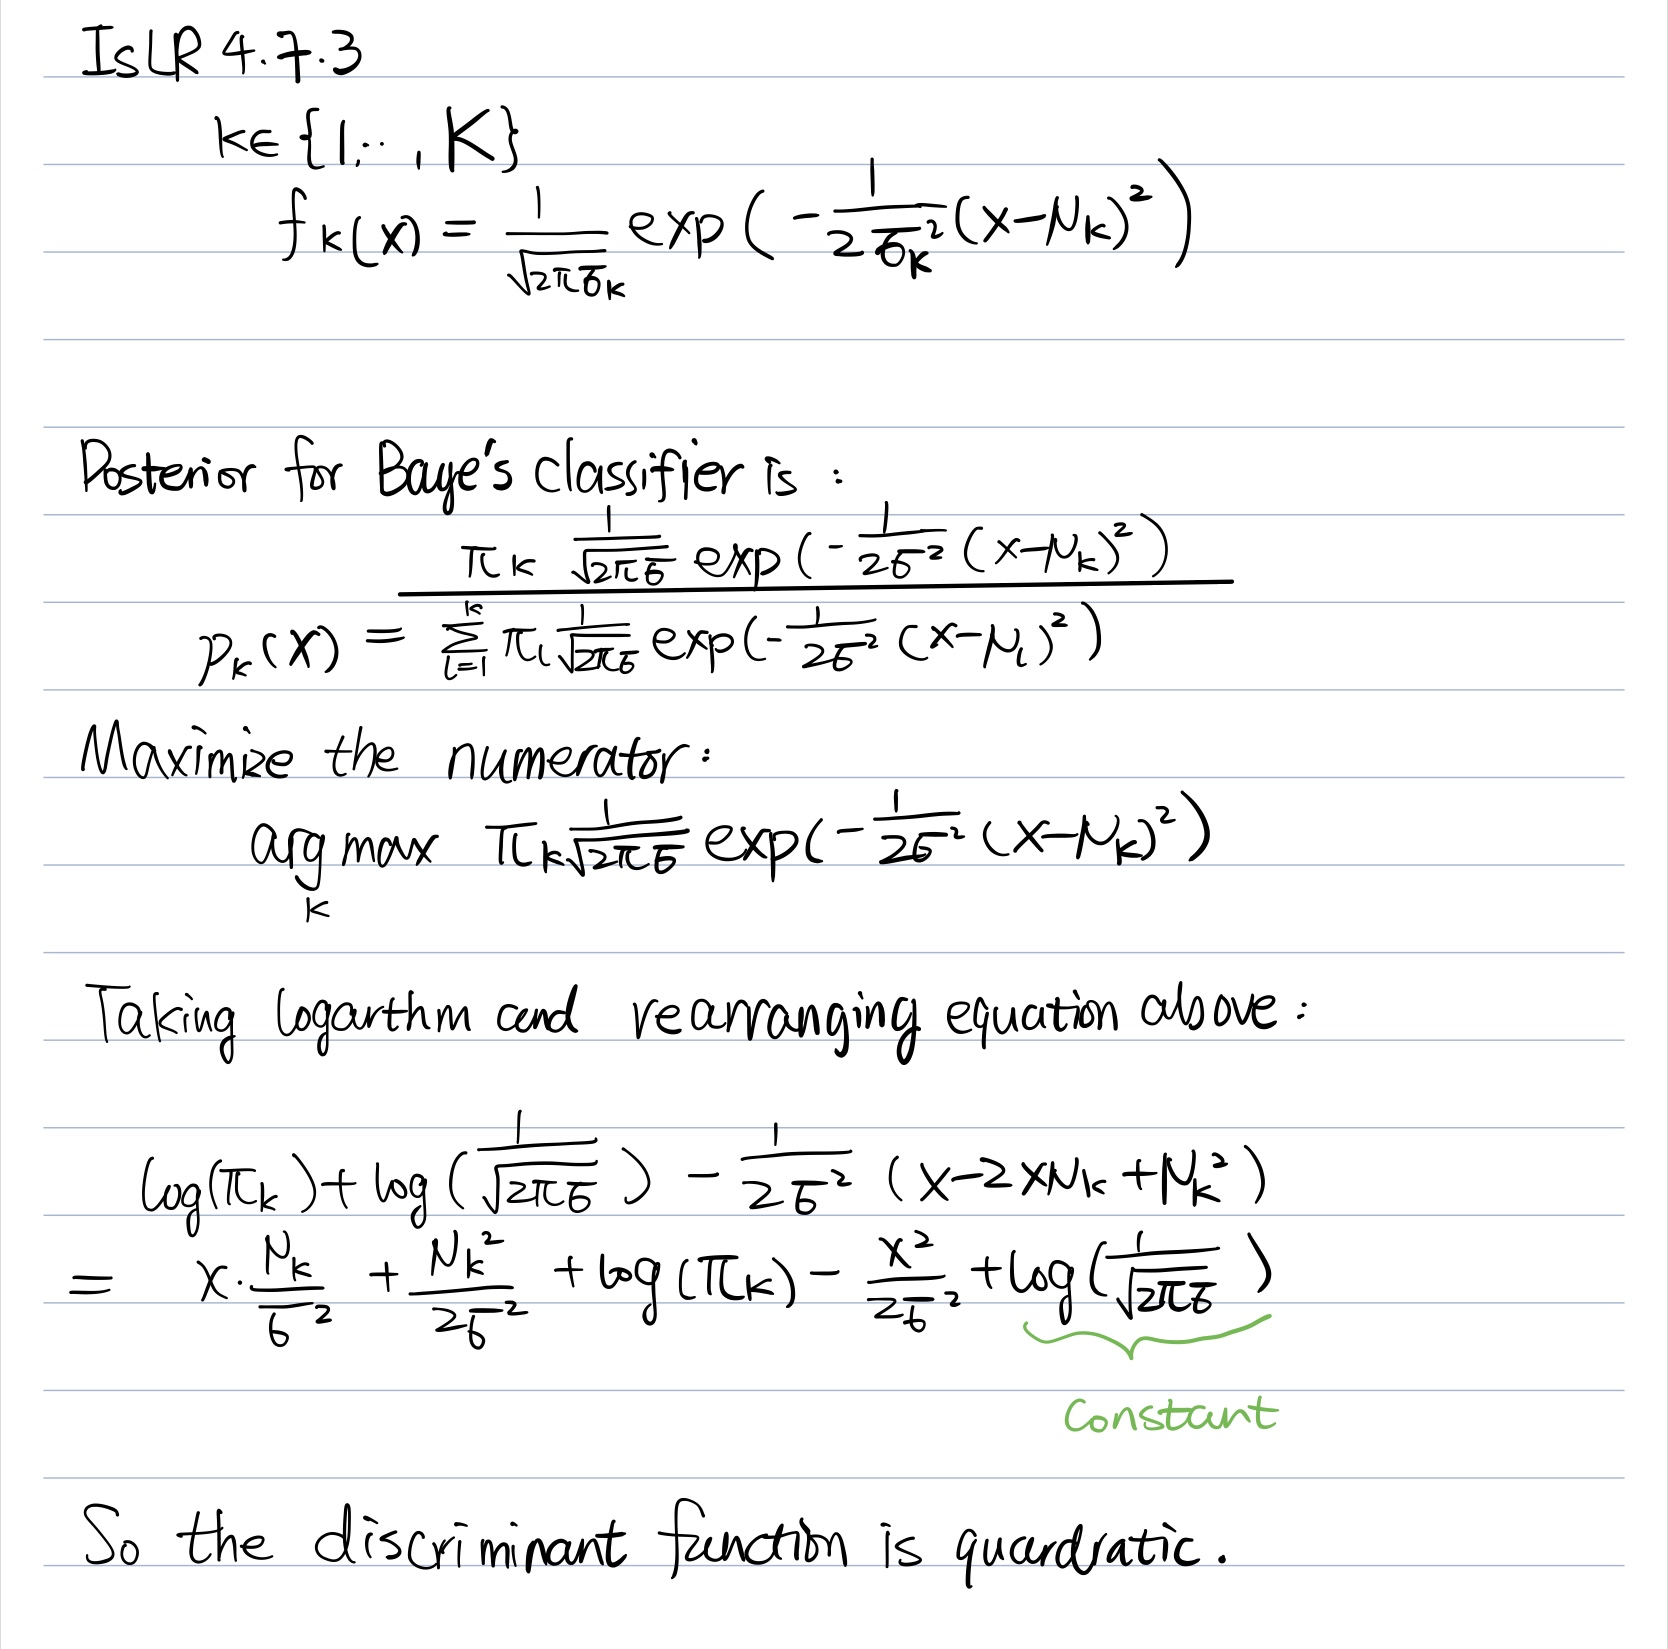

In [81]:
from IPython.display import Image
Image(filename = './' + "ISLR473.jpg")

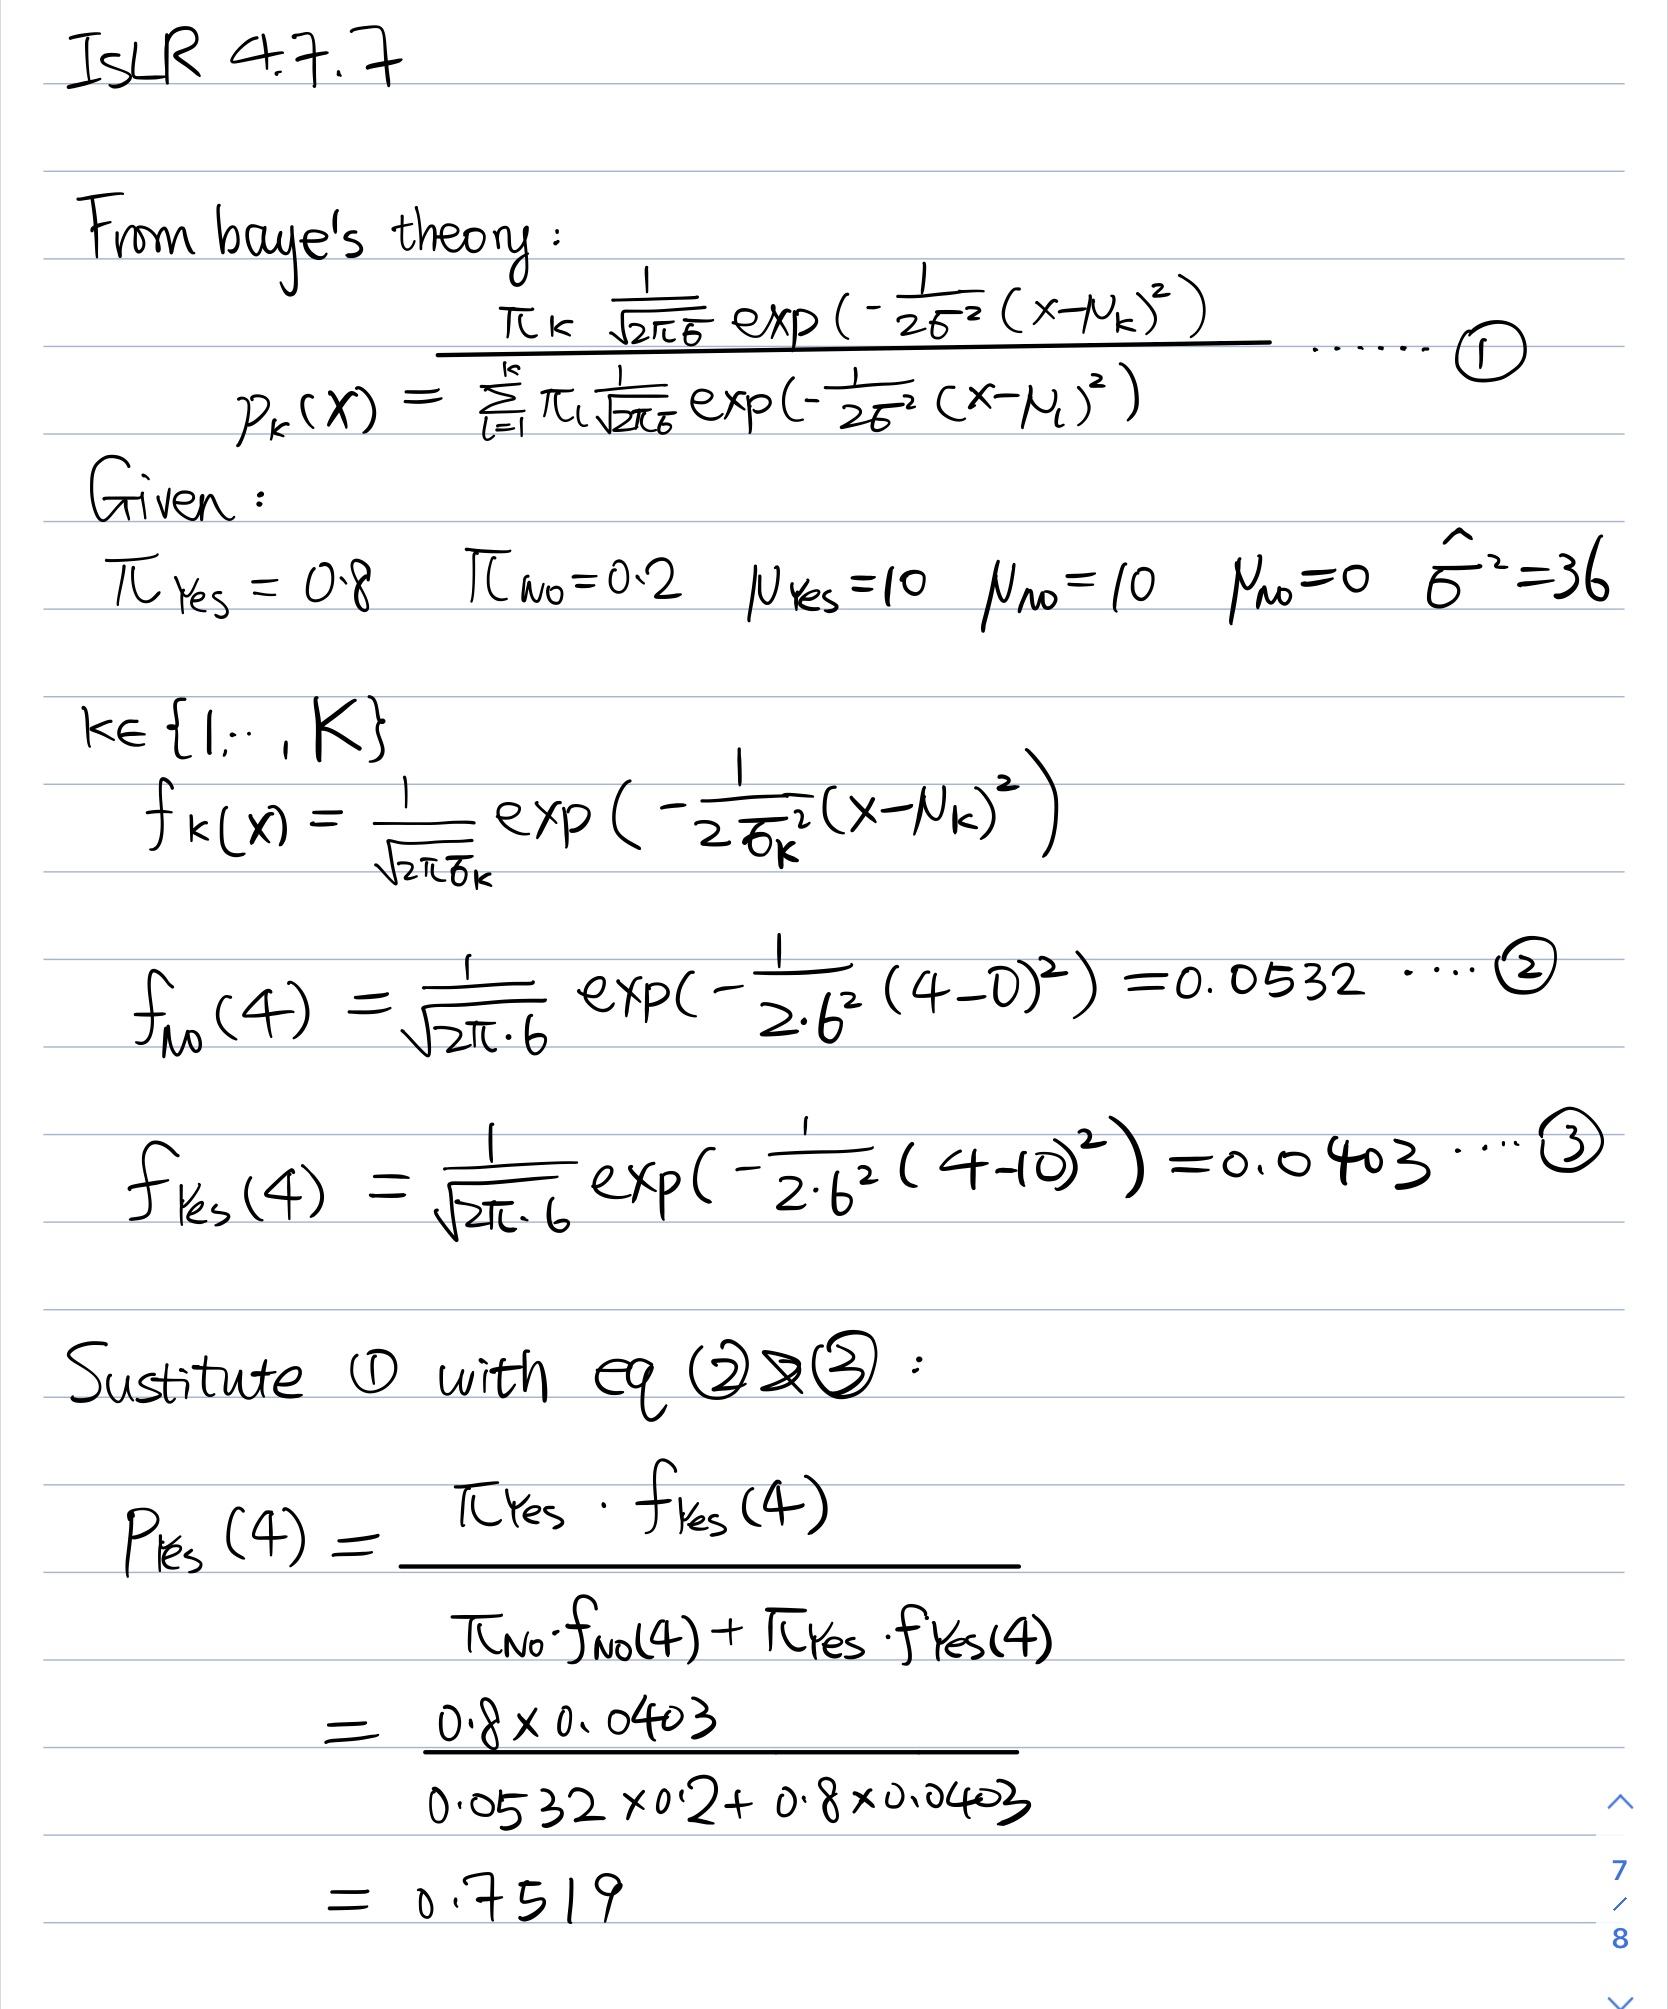

In [82]:
from IPython.display import Image
Image(filename = './' + "ISLR477.jpg")